### Verifying the dataset file presence

In [1]:
# to check if the dataset file exists

import os
print(os.listdir('./dataset/'))

['titanic.csv']


### Importation of necessary libraries

In [2]:
# to import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for inline plotting
%matplotlib inline

### Loading up the dataset

In [3]:
# to load dataset file into DF

DF = pd.read_csv(filepath_or_buffer = './dataset/titanic.csv', sep = ',')

In [4]:
# checking DF info

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
# check DF's data

DF.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

### Droping col's

In [6]:
# droping the first col from DF

DF.drop(columns = 'PassengerId', axis = 1, inplace = True)
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

In [7]:
# to check missing data
DF.isnull().head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False


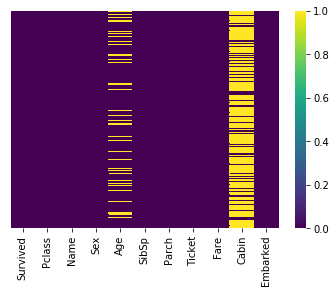

In [8]:
# visualizing the data to get col's holding NaN values

sns.heatmap(data = DF.isnull(), yticklabels = False, cmap = 'viridis')

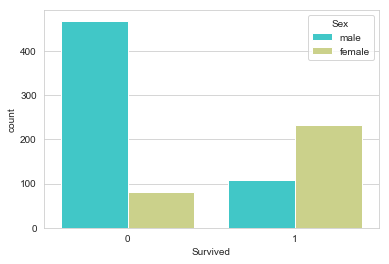

In [9]:
# visualizing the countplot for Survivals

sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = DF, hue = 'Sex', palette = 'rainbow')

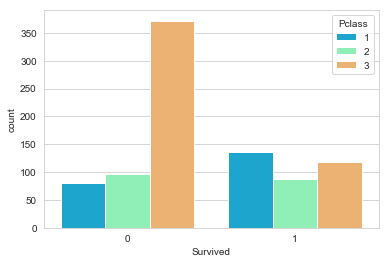

In [10]:
# visualizing the countplot for Survivals with hue of pclass

sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = DF, palette = 'rainbow')

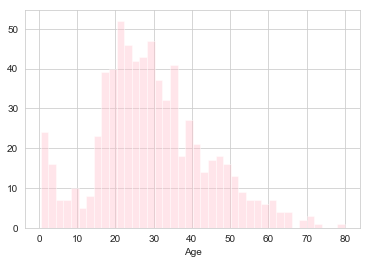

In [11]:
# distplot for age

sns.distplot(a = DF['Age'].dropna(), kde = False, bins = 40, color = 'pink')

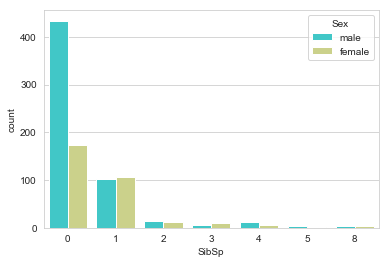

In [12]:
# countplot for SibSp - No. of siblings/spouse

sns.countplot(x = 'SibSp', data = DF, palette = 'rainbow', hue = 'Sex')

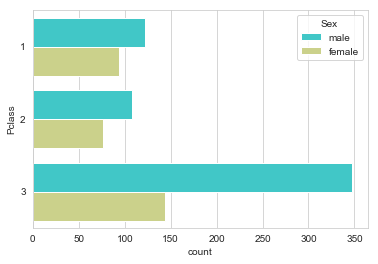

In [13]:
# to analyze how many people survived belongs to which class

sns.countplot(y = 'Pclass', data = DF, palette = 'rainbow', hue = 'Sex')

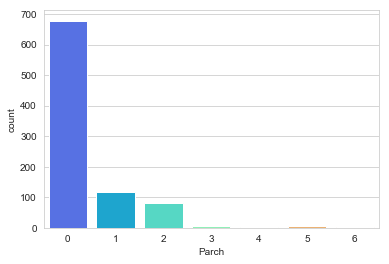

In [14]:
# passengers with children availability on the ship

sns.countplot(x = 'Parch', data = DF, palette = 'rainbow')

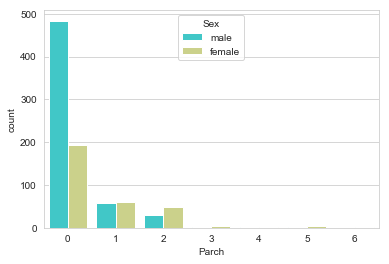

In [15]:
sns.countplot(x = 'Parch', hue = 'Sex', data = DF, palette = 'rainbow')

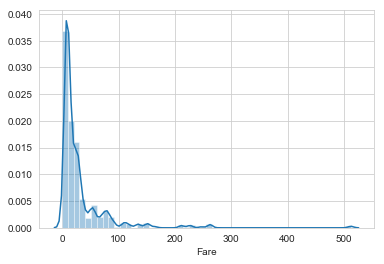

In [16]:
# plotting a plot to analyze survival based on fare

sns.distplot(a = DF['Fare'])

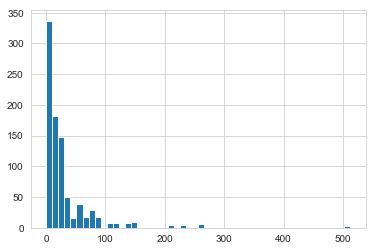

In [17]:
DF['Fare'].hist(bins = 50)

### Handling null values

In [18]:
DF['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [19]:
from sklearn.preprocessing import Imputer

In [20]:
imputer = Imputer(axis = 0, strategy = 'mean')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
DF['Age'] = imputer.fit_transform(np.array(DF['Age']).reshape(-1, 1))

In [22]:
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


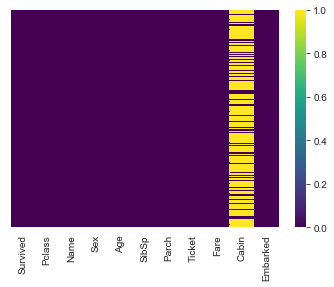

In [23]:
sns.heatmap(data = DF.isnull(), cmap = 'viridis', yticklabels=False)

In [24]:
DF['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Handling Categorical features

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
encoder.fit(DF['Sex'])
DF['Sex'] = encoder.transform(DF['Sex'])
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# handling Embarked feature

DF['Embarked'] = pd.get_dummies(data = DF['Embarked'], dtype = float)

In [28]:
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [29]:
cols = DF.columns
for col in cols:
    print(col, '...\n', DF[col].isnull().value_counts(), '\n\n')
        
    

Survived ...
 False    891
Name: Survived, dtype: int64 


Pclass ...
 False    891
Name: Pclass, dtype: int64 


Name ...
 False    891
Name: Name, dtype: int64 


Sex ...
 False    891
Name: Sex, dtype: int64 


Age ...
 False    891
Name: Age, dtype: int64 


SibSp ...
 False    891
Name: SibSp, dtype: int64 


Parch ...
 False    891
Name: Parch, dtype: int64 


Ticket ...
 False    891
Name: Ticket, dtype: int64 


Fare ...
 False    891
Name: Fare, dtype: int64 


Cabin ...
 True     687
False    204
Name: Cabin, dtype: int64 


Embarked ...
 False    891
Name: Embarked, dtype: int64 




In [30]:
# droping Cabin col

DF.drop(columns = 'Cabin', inplace = True)

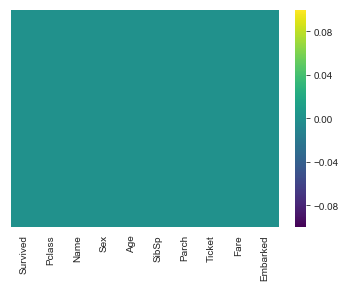

In [31]:
# rechecking the heatmap

sns.heatmap(data = DF.isnull(), cmap = 'viridis', yticklabels = False)

In [32]:
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0


### Separating the independent and dependent matrix

In [33]:
# X - independent matrix

X = DF.iloc[ : , [1, 3, 4, 5, 6, 8, 9]].values

# y - dependent matrix

y = DF.iloc[ : , 0].values

### Splitting training and test dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LG = LogisticRegression()

In [40]:
LG.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# predicting the outcome

y_predictor = LG.predict(X_test)
y_predictor

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0], dtype=int64)

### Checking the accuracy

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictor)
cm

array([[139,  21],
       [ 34,  74]], dtype=int64)

In [43]:
# checking the percentage accuracy

from sklearn.metrics import accuracy_score

In [44]:
accuracy = accuracy_score(y_test, y_predictor)
accuracy = accuracy * 100
accuracy

79.47761194029852